# 1. **Business Understanding**

To develope a predictive model that can accurately diagnose patient has diabetes or not.

Main Goals: 

build a reliable and accurate predictive model that can assist healthcare professionals in diagnosing diabetes early, potentially leading to better patient outcomes through timely intervention and treatment.

# 2. **Analytic Approach**

Selecting the right analytic approach to solve the problem. In this project the problem is about predicting the patient has diabetes or not. So we are going to use K-Nearest Neighbour, Support Vector Machine, Decision Tree, Random Forest, Gradient Boosting Machines(GBM) to solve the problem.

# 3. **Data Requirements**

Necessary data content, Data Formats, Sources for initial data collection.

In thin project we need to collect data about the patient diabetes.

# 4. **Data Collection**

After the initial data collection is performed, an assessment by the data scientist takes place to determine whether or not they have what they need

# 5. **Data Understanding**

Data understanding encompasses all activities related to constructing the data set.

## **Import libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
import graphviz
import matplotlib.image as mpimg
from IPython.display import Image
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import keras
from keras.models import Sequential
from keras.layers import Dense


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### **Read the data**

In [69]:
df = pd.read_csv('diabetes.csv')

df.head(10) 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


**Check number of rows and columns**

In [70]:
rows , col = df.shape

print (f'Number of rows: {rows} \n\nNumber of columns:{col}')

Number of rows: 768 

Number of columns:9


**Check missing values**

In [71]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Info about the data**

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Check duplicate**

In [73]:
df.duplicated().any()

False

**Summary about the data**

In [74]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 6. **Data Preparation**

EDA

**Visualization data**

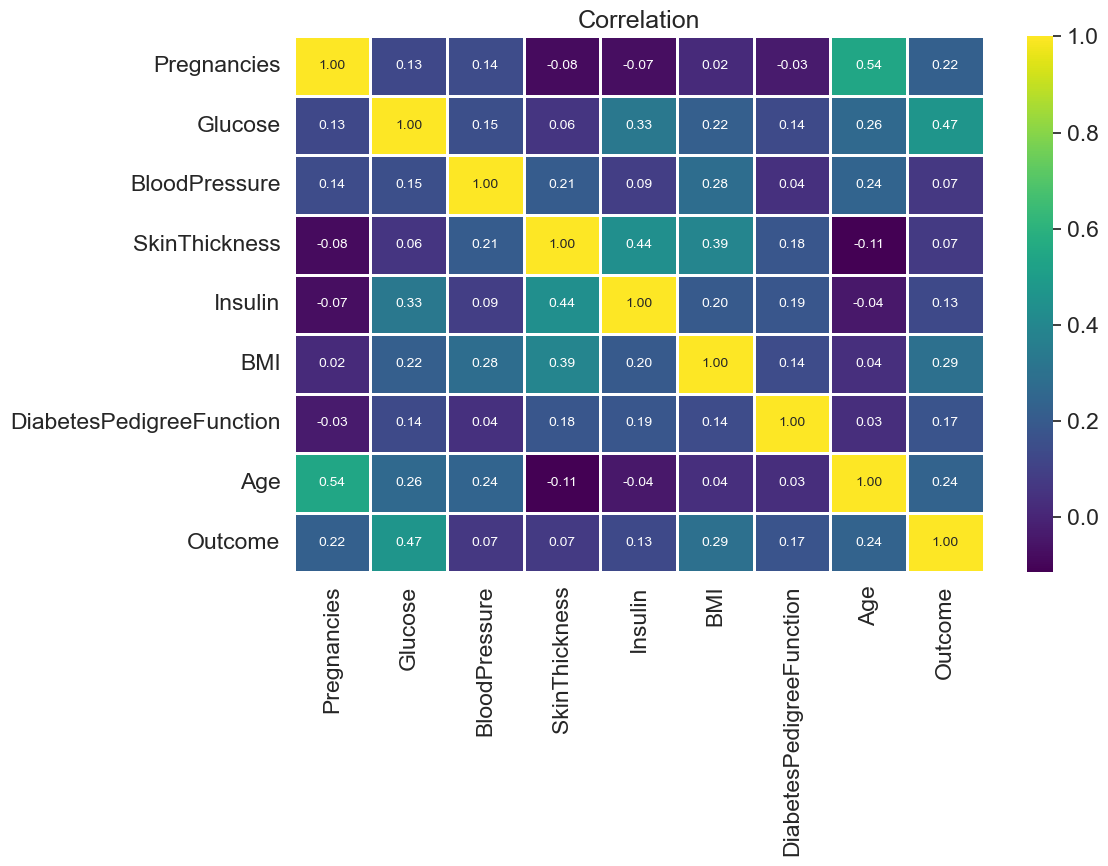

In [75]:
plt.figure(figsize=(12,9))
sns.set(font_scale=1.5)

sns.heatmap(df.corr(), cmap='viridis',annot=True,fmt='.2f', annot_kws={'fontsize':10}, linewidths=0.8)
plt.title('Correlation')
plt.tight_layout()
plt.show()

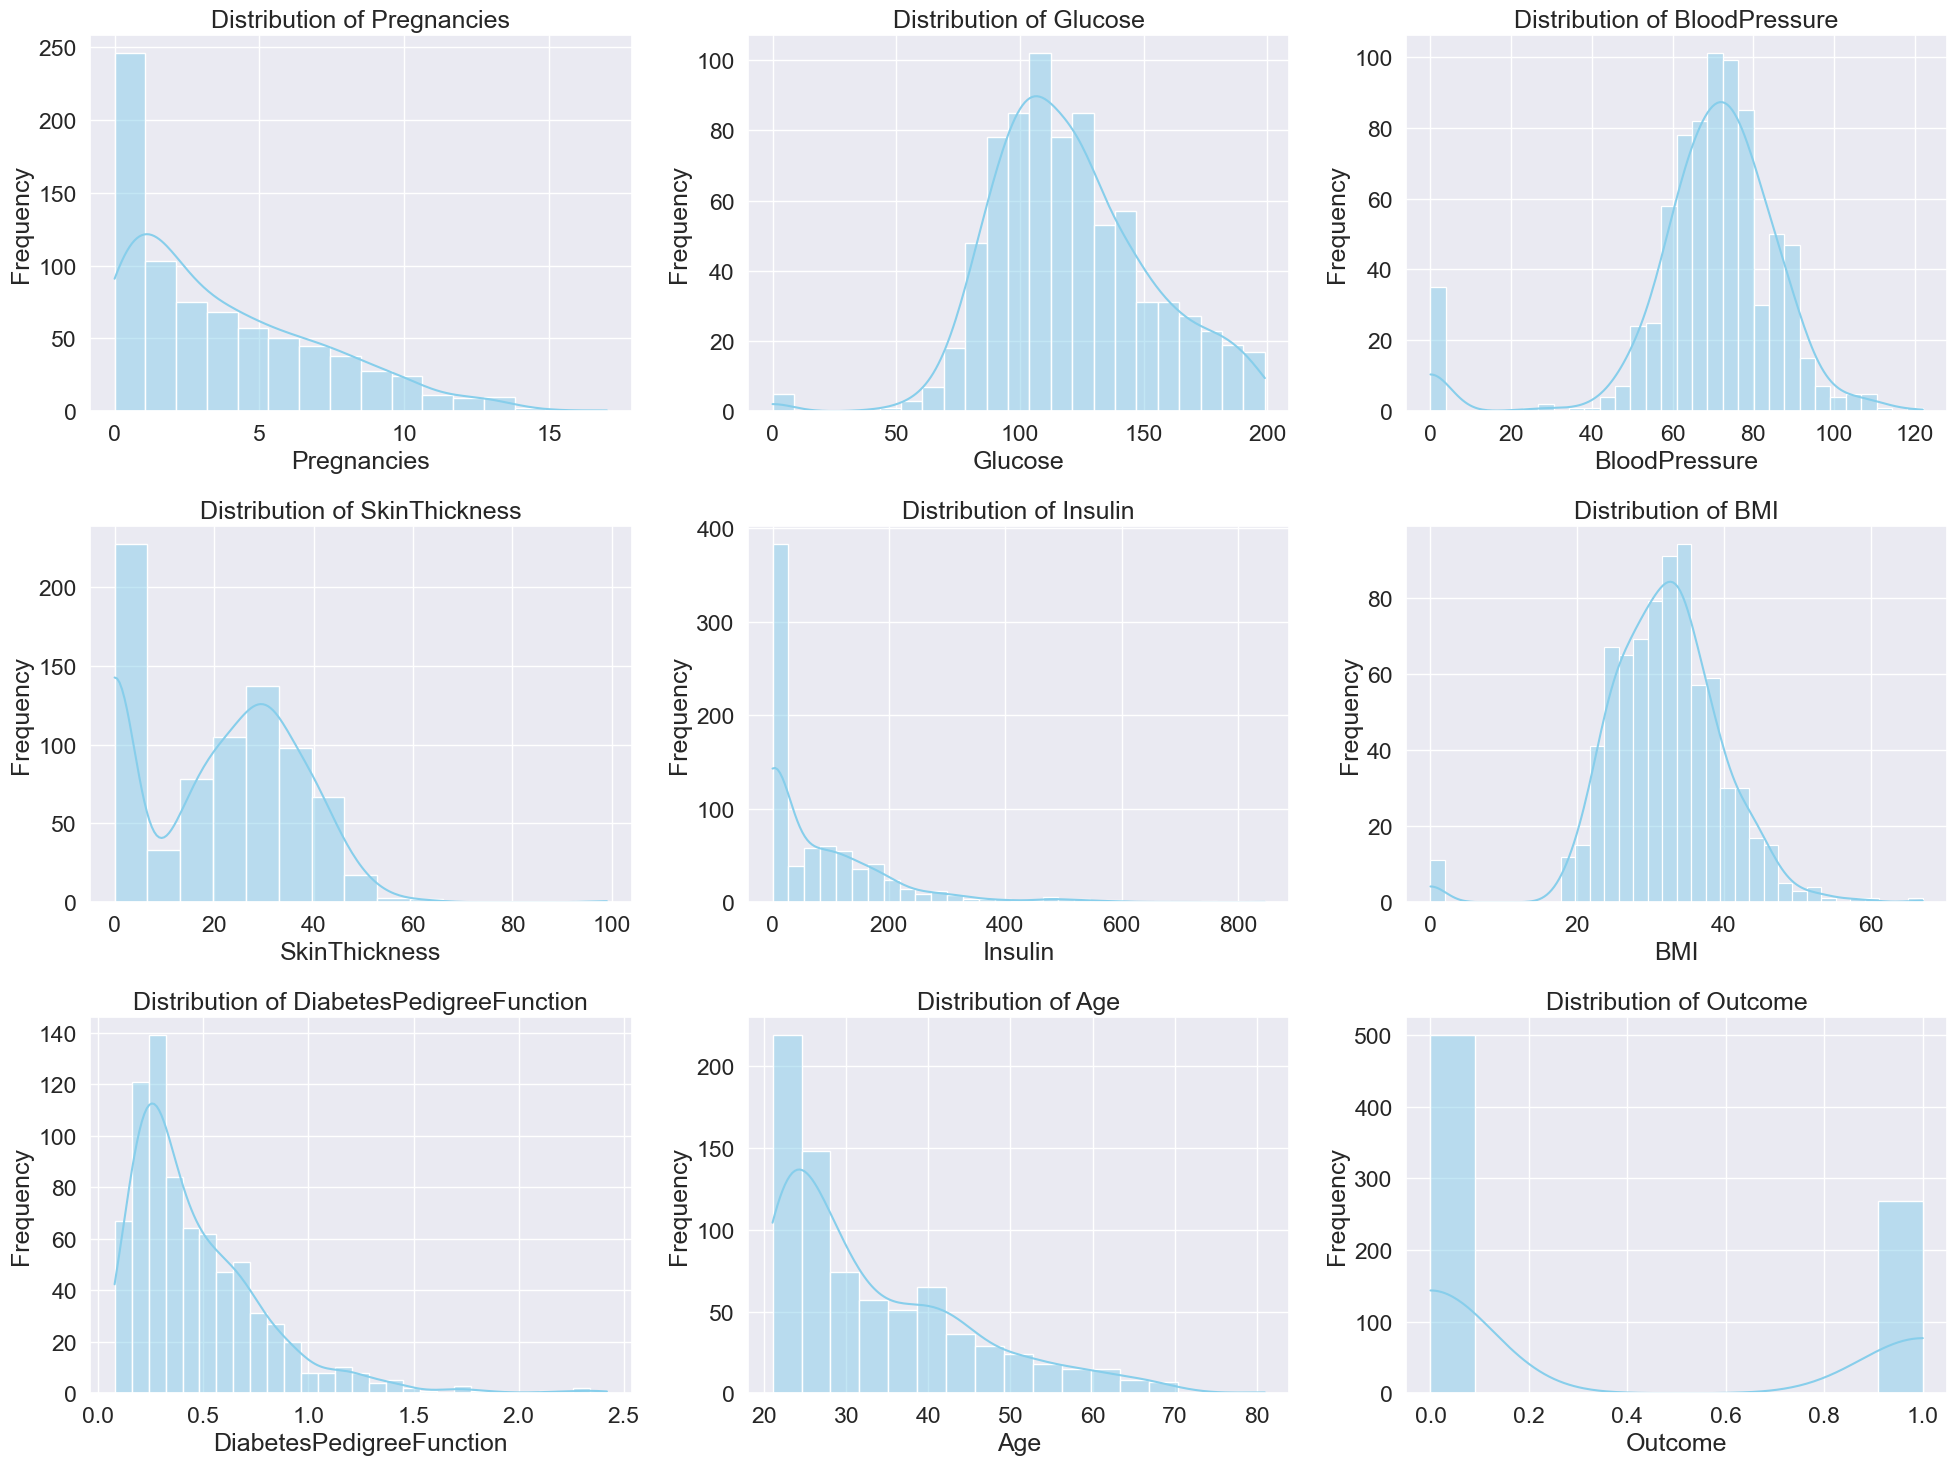

In [76]:
# Select only numerical columns for visualization
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Set the number of rows and columns for subplots
num_rows = 3
num_cols = 3

# Create subplots for each numerical column
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_columns.columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

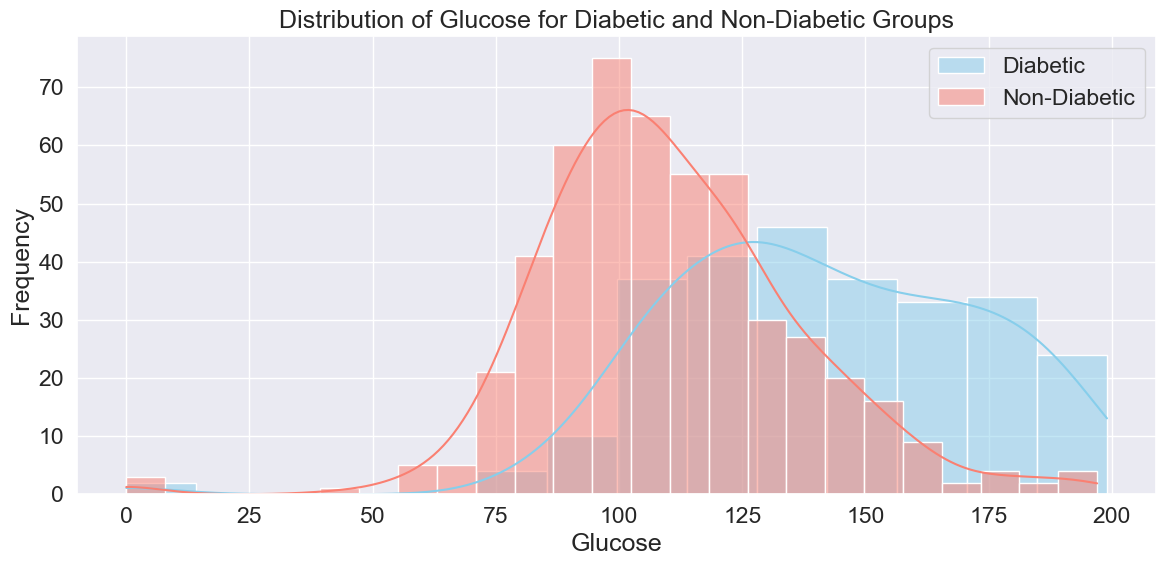

In [77]:
# Set figure size
plt.figure(figsize=(12, 6))

# Create histograms of Glucose values for diabetic and non-diabetic groups
sns.histplot(data=df[df['Outcome'] == 1]['Glucose'], kde=True, color='skyblue', label='Diabetic', alpha=0.5)
sns.histplot(data=df[df['Outcome'] == 0]['Glucose'], kde=True, color='salmon', label='Non-Diabetic', alpha=0.5)

# Add labels and title
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.title('Distribution of Glucose for Diabetic and Non-Diabetic Groups')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

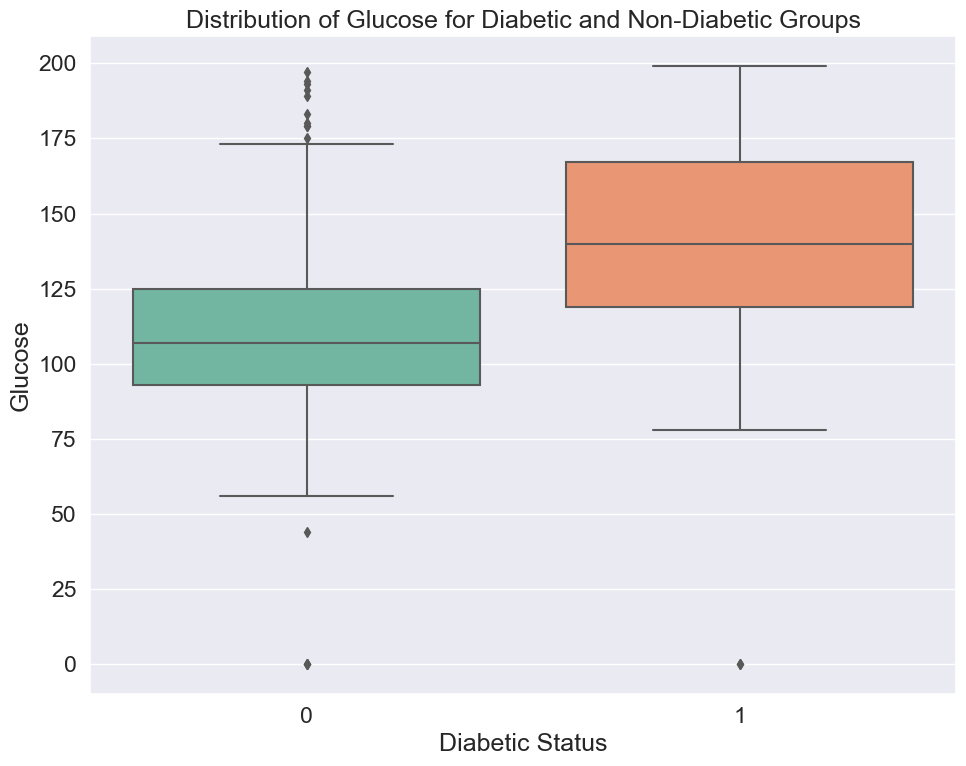

In [78]:
# Set figure size
plt.figure(figsize=(10, 8))

# Create a box plot of Glucose values for diabetic and non-diabetic groups
sns.boxplot(x='Outcome', y='Glucose', data=df, palette='Set2')

# Add labels and title
plt.xlabel('Diabetic Status')
plt.ylabel('Glucose')
plt.title('Distribution of Glucose for Diabetic and Non-Diabetic Groups')

# Show plot
plt.tight_layout()
plt.show()

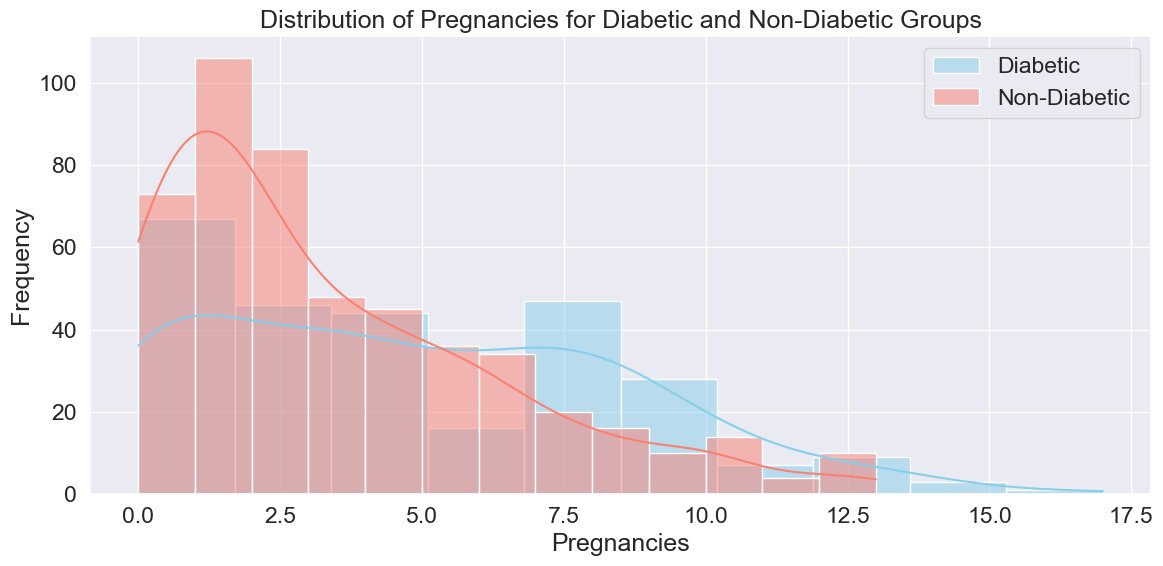

In [79]:
# Set figure size
plt.figure(figsize=(12, 6))

# Create histograms of Pregnancies values for diabetic and non-diabetic groups
sns.histplot(data=df[df['Outcome'] == 1]['Pregnancies'], kde=True, color='skyblue', label='Diabetic', alpha=0.5)
sns.histplot(data=df[df['Outcome'] == 0]['Pregnancies'], kde=True, color='salmon', label='Non-Diabetic', alpha=0.5)

# Add labels and title
plt.xlabel('Pregnancies')
plt.ylabel('Frequency')
plt.title('Distribution of Pregnancies for Diabetic and Non-Diabetic Groups')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

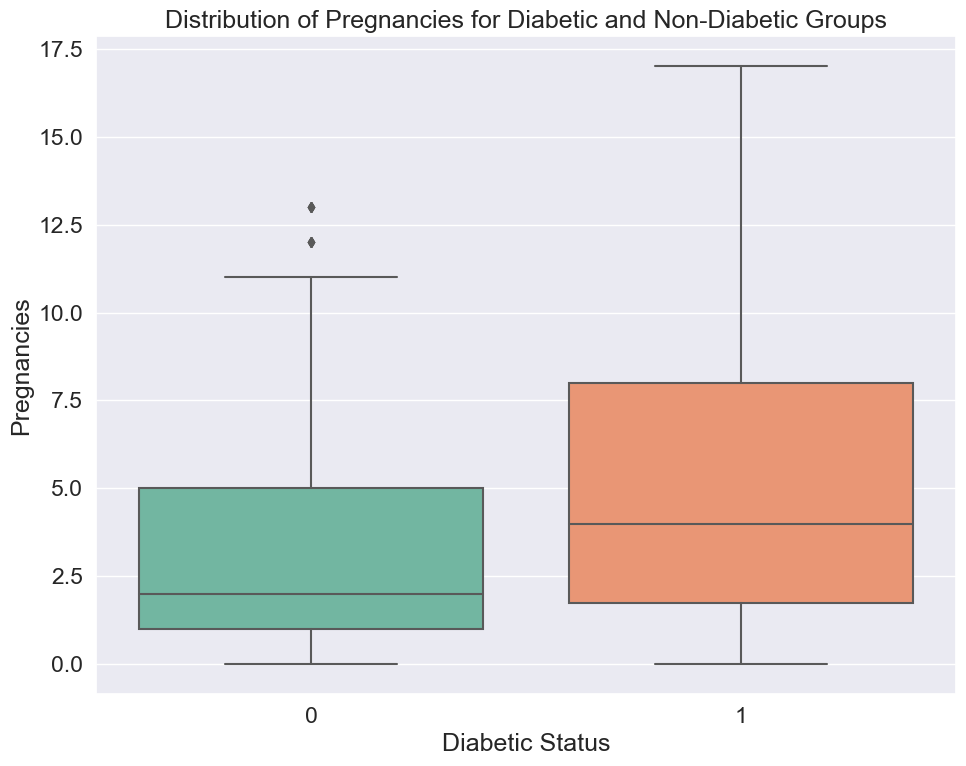

In [46]:
# Set figure size
plt.figure(figsize=(10, 8))

# Create a box plot of Pregnancies values for diabetic and non-diabetic groups
sns.boxplot(x='Outcome', y='Pregnancies', data=df, palette='Set2')

# Add labels and title
plt.xlabel('Diabetic Status')
plt.ylabel('Pregnancies')
plt.title('Distribution of Pregnancies for Diabetic and Non-Diabetic Groups')

# Show plot
plt.tight_layout()
plt.show()

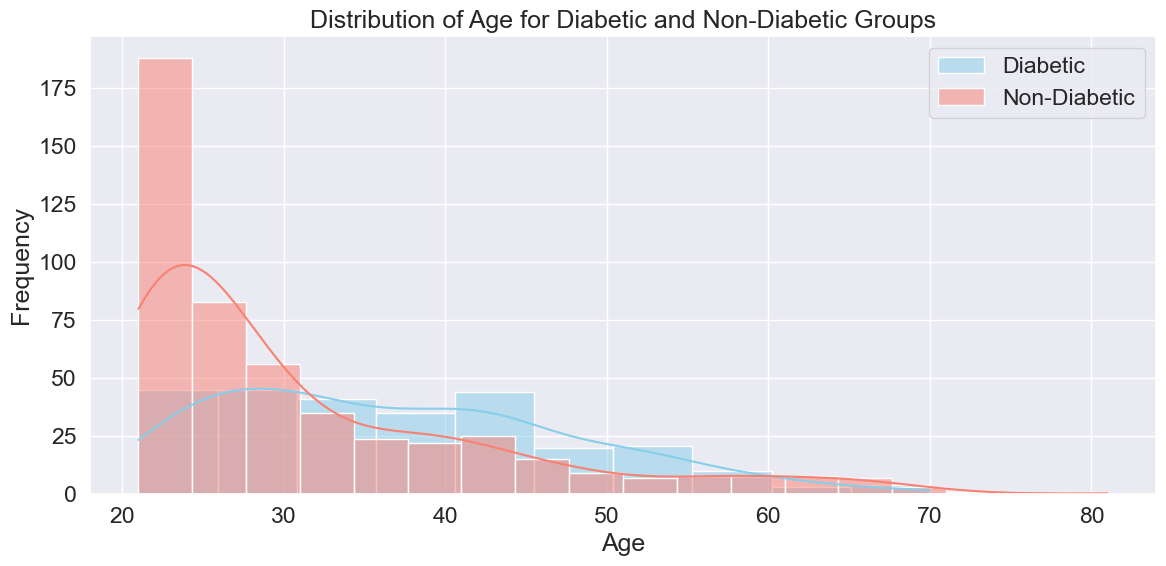

In [80]:
# Set figure size
plt.figure(figsize=(12, 6))

# Create histograms of Age values for diabetic and non-diabetic groups
sns.histplot(data=df[df['Outcome'] == 1]['Age'], kde=True, color='skyblue', label='Diabetic', alpha=0.5)
sns.histplot(data=df[df['Outcome'] == 0]['Age'], kde=True, color='salmon', label='Non-Diabetic', alpha=0.5)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age for Diabetic and Non-Diabetic Groups')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

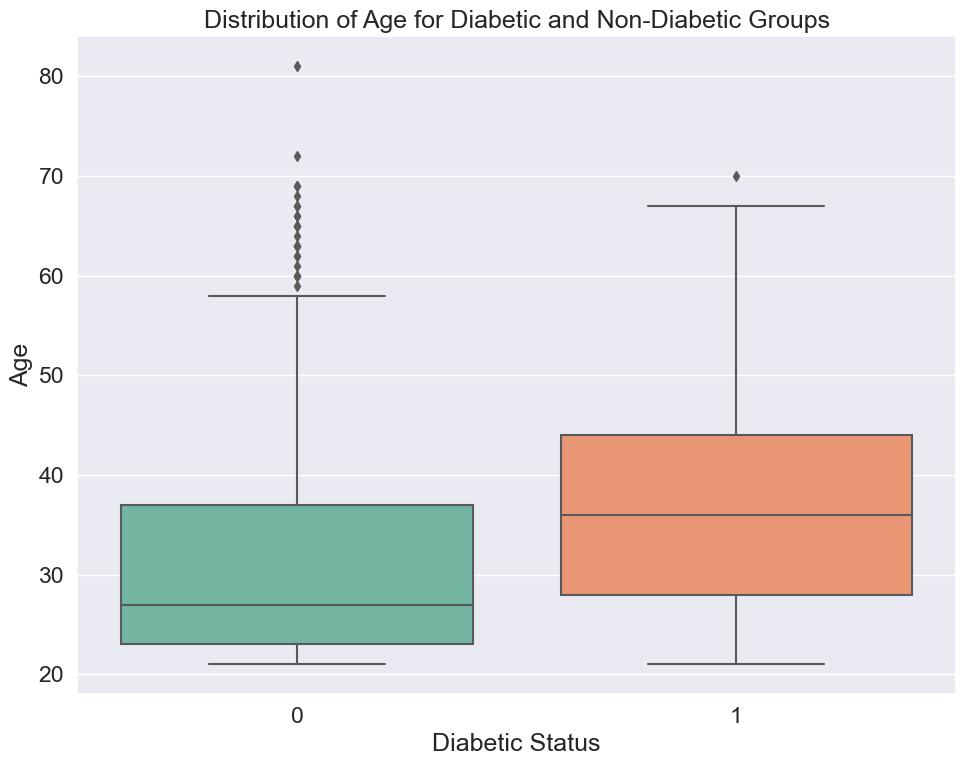

In [52]:
# Set figure size
plt.figure(figsize=(10, 8))

# Create a box plot of Age values for diabetic and non-diabetic groups
sns.boxplot(x='Outcome', y='Age', data=df, palette='Set2')

# Add labels and title
plt.xlabel('Diabetic Status')
plt.ylabel('Age')
plt.title('Distribution of Age for Diabetic and Non-Diabetic Groups')

# Show plot
plt.tight_layout()
plt.show()

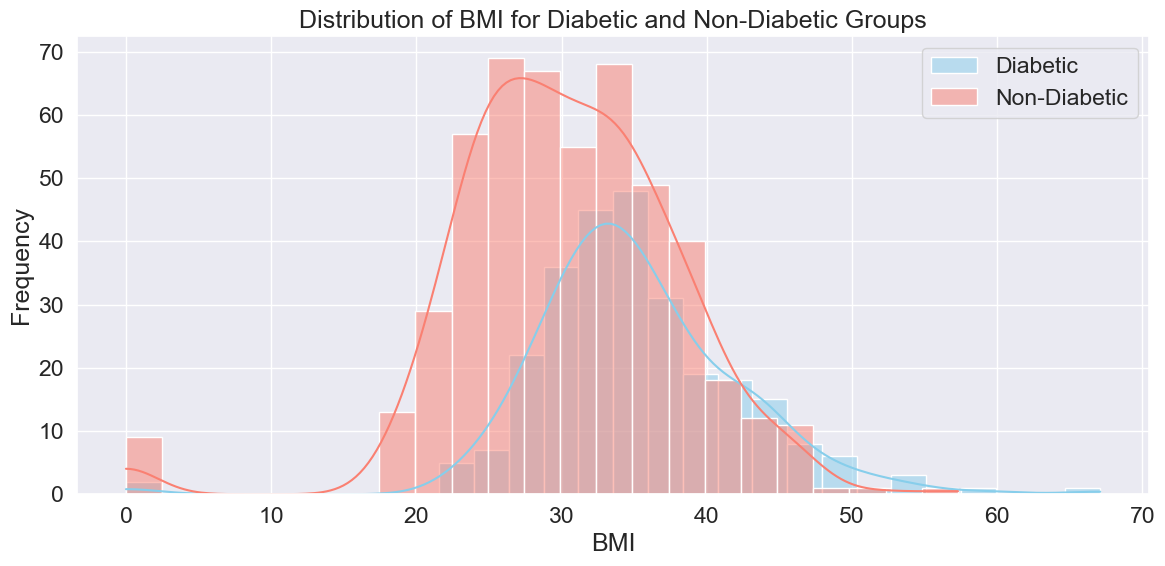

In [81]:
# Set figure size
plt.figure(figsize=(12, 6))

# Create histograms of BMI values for diabetic and non-diabetic groups
sns.histplot(data=df[df['Outcome'] == 1]['BMI'], kde=True, color='skyblue', label='Diabetic', alpha=0.5)
sns.histplot(data=df[df['Outcome'] == 0]['BMI'], kde=True, color='salmon', label='Non-Diabetic', alpha=0.5)

# Add labels and title
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI for Diabetic and Non-Diabetic Groups')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

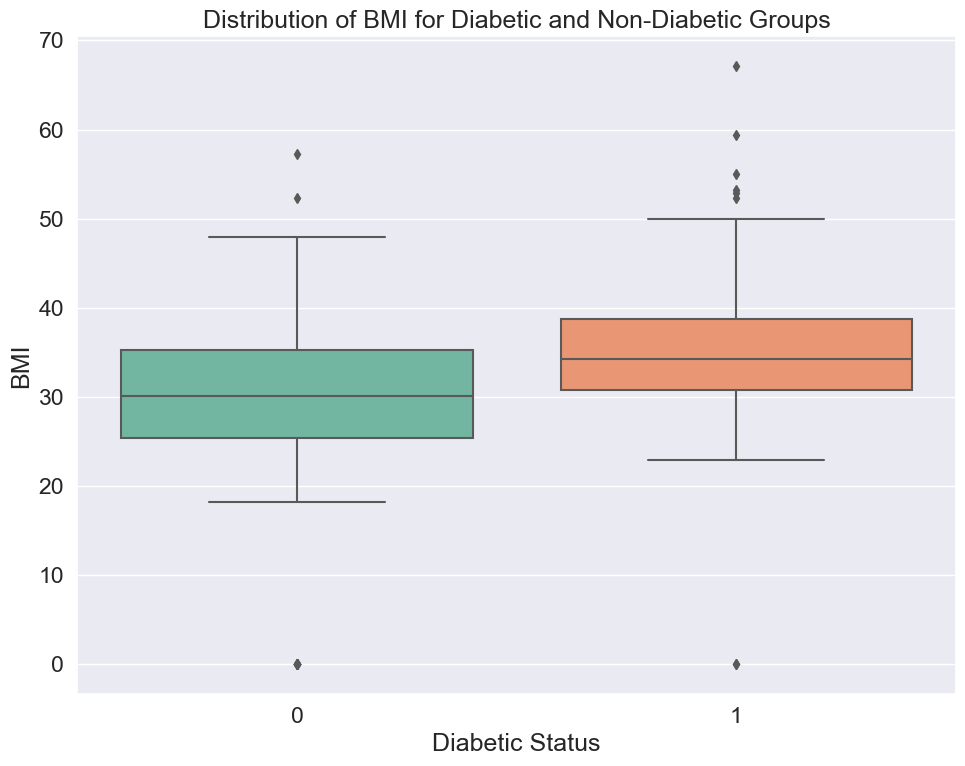

In [82]:
# Set figure size
plt.figure(figsize=(10, 8))

# Create a box plot of BMI values for diabetic and non-diabetic groups
sns.boxplot(x='Outcome', y='BMI', data=df, palette='Set2')

# Add labels and title
plt.xlabel('Diabetic Status')
plt.ylabel('BMI')
plt.title('Distribution of BMI for Diabetic and Non-Diabetic Groups')

# Show plot
plt.tight_layout()
plt.show()

In [22]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Normalize the number using standardscaler

In [23]:
sc = StandardScaler()

In [24]:
features = df.drop(['Outcome','Age'],axis=1)

In [25]:
sc.fit(features)

features_scaled = sc.transform(features)

features_scaled = pd.DataFrame(features_scaled, columns=features.columns)

Age = df['Age']

features_scaled['Age'] = Age

X = features_scaled

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,50
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,31
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,32
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,21
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,33


In [26]:
y = df.iloc[:,-1]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

**Create Training & Testing Set**

We split the dataset into training and testing sets using the train_test_split function from the scikit-learn library. This step is crucial in machine learning to evaluate the performance of our models on unseen data. The data splitting was performed with a test size of 20% and a random state of 42 to ensure reproducibility.

In [27]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42)

print ('X_train shape:', X_train.shape,'\n\n','X_test shape: ', X_test.shape,'\n\n','y_train shape: ', y_train.shape,'\n\n','y_test shape: ',y_test.shape)

X_train shape: (614, 8) 

 X_test shape:  (154, 8) 

 y_train shape:  (614,) 

 y_test shape:  (154,)


# 7. **Modeling**

**K-Nearest Neighbour(KNN)**

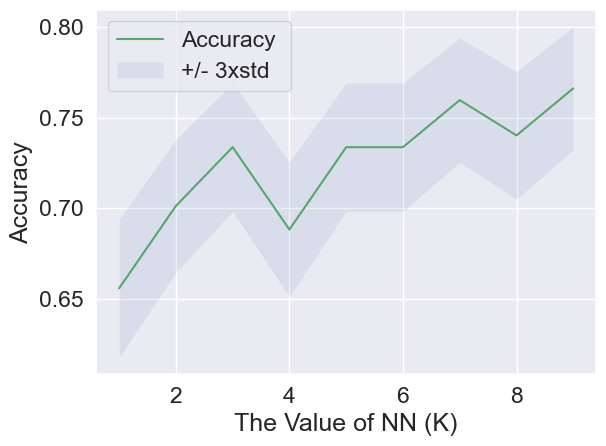

The highest accuracy achieved with K-Nearest Neighbors is: 76.62% for k=9


In [28]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1, Ks):
    # Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat == y_test) / np.sqrt(yhat.shape[0])

plt.plot(range(1, Ks), mean_acc, 'g')
plt.fill_between(range(1, Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('The Value of NN (K)')
plt.tight_layout()
plt.show()

max_accuracy = np.max(mean_acc)
optimal_k = np.argmax(mean_acc) + 1

print(f'The highest accuracy achieved with K-Nearest Neighbors is: {max_accuracy*100:.2f}% for k={optimal_k}')

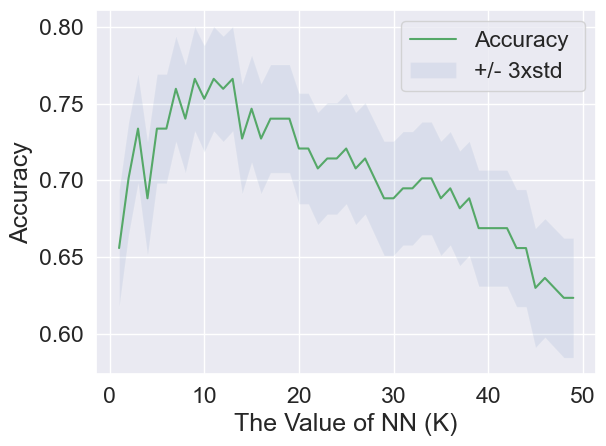

The highest accuracy achieved with K-Nearest Neighbors is: 76.62% for k=9


In [29]:
Ks = 50
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1, Ks):
    # Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat == y_test) / np.sqrt(yhat.shape[0])

plt.plot(range(1, Ks), mean_acc, 'g')
plt.fill_between(range(1, Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('The Value of NN (K)')
plt.tight_layout()
plt.show()

max_accuracy = np.max(mean_acc)
optimal_k = np.argmax(mean_acc) + 1

print(f'The highest accuracy achieved with K-Nearest Neighbors is: {max_accuracy*100:.2f}% for k={optimal_k}')

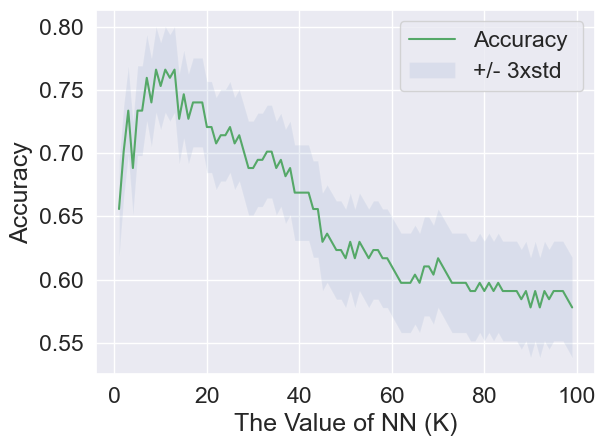

The highest accuracy achieved with K-Nearest Neighbors is: 76.62% for k=9


In [30]:
Ks = 100
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1, Ks):
    # Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat == y_test) / np.sqrt(yhat.shape[0])

plt.plot(range(1, Ks), mean_acc, 'g')
plt.fill_between(range(1, Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('The Value of NN (K)')
plt.tight_layout()
plt.show()

max_accuracy = np.max(mean_acc)
optimal_k = np.argmax(mean_acc) + 1

print(f'The highest accuracy achieved with K-Nearest Neighbors is: {max_accuracy*100:.2f}% for k={optimal_k}')

**The provided code iterates over different values of K, evaluates the model's accuracy using cross-validation, and visualizes the results using a plot. After analyzing the results, the optimal K value for the KNN algorithm is determined to be K=9, achieving an accuracy of 76.62%.**

Confusion Matrix(KNN):
[[83 16]
 [20 35]] 


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



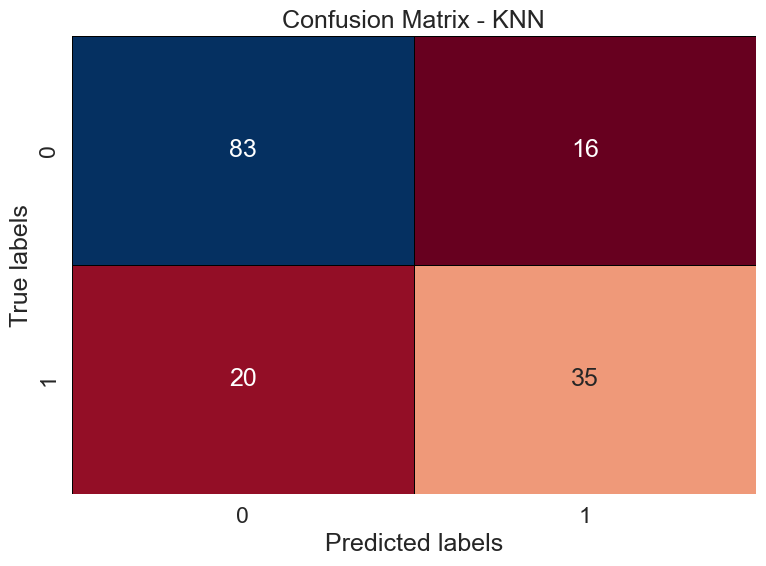

In [31]:
# Assuming you have already trained and tested the KNN classifier
optimal_k = 9
knn_classifier = KNeighborsClassifier(n_neighbors=optimal_k)
knn_classifier.fit(X_train, y_train)

# Predict labels on the test set
y_pred = knn_classifier.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix(KNN):")
print(conf_matrix, '\n')

# Print classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='RdBu', cbar=False, linewidths=0.5, linecolor='black')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.tight_layout()
plt.show()

- 83 instances were correctly identified as non-diabetic (True Negatives).
- 35 instances were correctly identified as diabetic (True Positives).
- 16 instances were incorrectly classified as diabetic when they were non-diabetic (False Positives).
- 20 instances were incorrectly classified as non-diabetic when they were diabetic (False Negatives).

This concise breakdown provides an easy-to-understand overview of the KNN classifier's performance in distinguishing between diabetic and non-diabetic individuals.

**Support Vector Machine(SVM)**

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

def train_and_evaluate_svm(kernel_type, X_train, X_test, y_train, y_test):
    
    svc = SVC(kernel=kernel_type)
    
    svc.fit(X_train, y_train)
    
    y_pred = svc.predict(X_test)
    
    accuracy = metrics.accuracy_score(y_test, y_pred)
    
    print(f'The Accuracy with {kernel_type} kernel is: {accuracy*100:.2f}%')

    return y_pred

In [33]:
rbf_y_pred = train_and_evaluate_svm('rbf', X_train, X_test, y_train, y_test)
print('\n\n')
linear_y_pred = train_and_evaluate_svm('linear', X_train, X_test, y_train, y_test)
print('\n\n')
poly_y_pred = train_and_evaluate_svm('poly', X_train, X_test, y_train, y_test)
print('\n\n')
sigmoid_y_pred = train_and_evaluate_svm('sigmoid', X_train, X_test, y_train, y_test)

The Accuracy with rbf kernel is: 61.69%





The Accuracy with linear kernel is: 75.97%



The Accuracy with poly kernel is: 66.88%



The Accuracy with sigmoid kernel is: 64.94%


**The Accuracy with linear kernel is: 75.97%**

So for this SVM model, we are going to proceed using Linear kernel.

Rounded Accuracy Scores: [77.22, 77.09, 77.09, 77.09, 77.22, 77.09, 77.09, 76.83, 76.96]


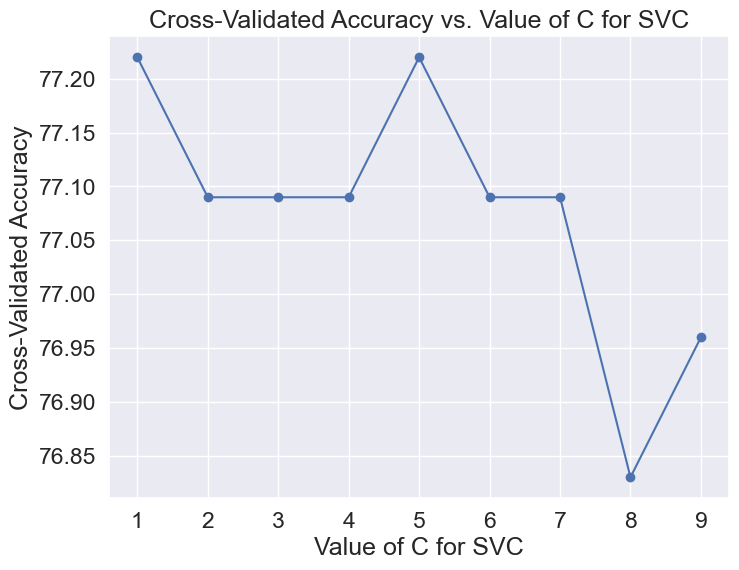

In [34]:
C_values = list(np.arange(1, 10))

# Calculate cross-validated accuracy for each C value
acc_scores = []
for c in C_values:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score_mean = round(scores.mean() * 100, 2)  # Round to two decimal places
    acc_scores.append(acc_score_mean)

# Print the list of rounded accuracy scores
print("Rounded Accuracy Scores:", acc_scores)

# Plot cross-validated accuracy versus C values
plt.figure(figsize=(8, 6))
plt.plot(C_values, acc_scores, marker='o', linestyle='-')
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross-Validated Accuracy vs. Value of C for SVC')
plt.grid(True)
plt.show()

Rounded Accuracy Scores: [77.24, 77.11, 77.11, 77.11, 77.36, 77.23, 77.1, 77.23, 77.23]


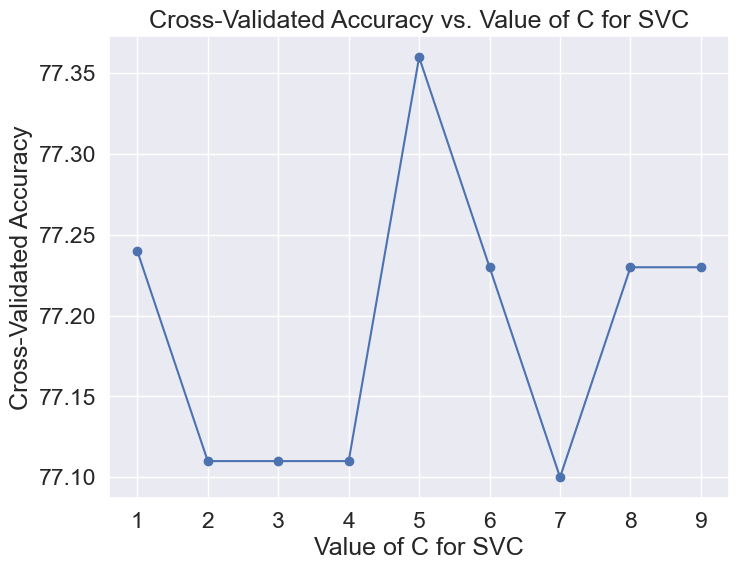

In [35]:
C_values = list(np.arange(1, 10))

# Calculate cross-validated accuracy for each C value
acc_scores = []
for c in C_values:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=30, scoring='accuracy')
    acc_score_mean = round(scores.mean() * 100, 2)  # Round to two decimal places
    acc_scores.append(acc_score_mean)

# Print the list of rounded accuracy scores
print("Rounded Accuracy Scores:", acc_scores)

# Plot cross-validated accuracy versus C values
plt.figure(figsize=(8, 6))
plt.plot(C_values, acc_scores, marker='o', linestyle='-')
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross-Validated Accuracy vs. Value of C for SVC')
plt.grid(True)
plt.show()

Rounded Accuracy Scores: [77.38, 77.25, 77.11, 77.25, 77.38, 77.38, 77.38, 77.38, 77.23]


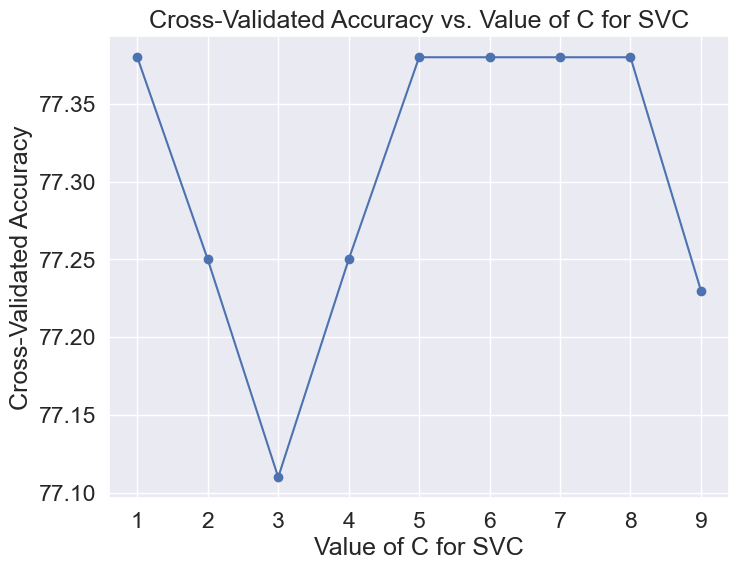

In [36]:
C_values = list(np.arange(1, 10))

# Calculate cross-validated accuracy for each C value
acc_scores = []
for c in C_values:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=100, scoring='accuracy')
    acc_score_mean = round(scores.mean() * 100, 2)  # Round to two decimal places
    acc_scores.append(acc_score_mean)

# Print the list of rounded accuracy scores
print("Rounded Accuracy Scores:", acc_scores)

# Plot cross-validated accuracy versus C values
plt.figure(figsize=(8, 6))
plt.plot(C_values, acc_scores, marker='o', linestyle='-')
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross-Validated Accuracy vs. Value of C for SVC')
plt.grid(True)
plt.show()

**The cross-validation results show that the Support Vector Machine (SVM) classifier with a linear kernel achieves a consistent accuracy of around 77% across different numbers of folds (10, 30, and 100). This suggests that the model performs moderately well in predicting whether a patient has diabetes based on the given features. However, further evaluation using additional metrics and validation techniques may be needed to fully assess the model's effectiveness and generalization capability.**

In [37]:
print('Confusion Matrix (Linear SVM):')
print(confusion_matrix(y_test, linear_y_pred))

print('\nClassification Report (Linear SVM):')
print(classification_report(y_test, linear_y_pred))

Confusion Matrix (Linear SVM):
[[81 18]
 [19 36]]

Classification Report (Linear SVM):
              precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



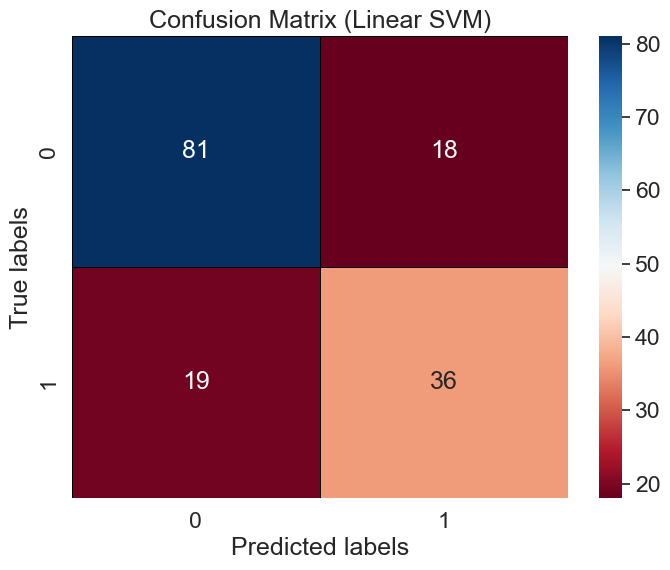

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, linear_y_pred), annot=True, cmap='RdBu', fmt='g',linewidths=0.5,linecolor='black')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Linear SVM)')
plt.show()

- 81 instances were correctly identified as non-diabetic (True Negatives).
- 36 instances were correctly identified as diabetic (True Positives).
- 18 instances were incorrectly classified as diabetic when they were non-diabetic (False Positives).
- 19 instances were incorrectly classified as non-diabetic when they were diabetic (False Negatives).

This breakdown provides a straightforward understanding of how well the linear SVM classifier distinguishes between diabetic and non-diabetic individuals

**Decision Tree**

The Accuracy of the diabetes tree is: 75.97% 




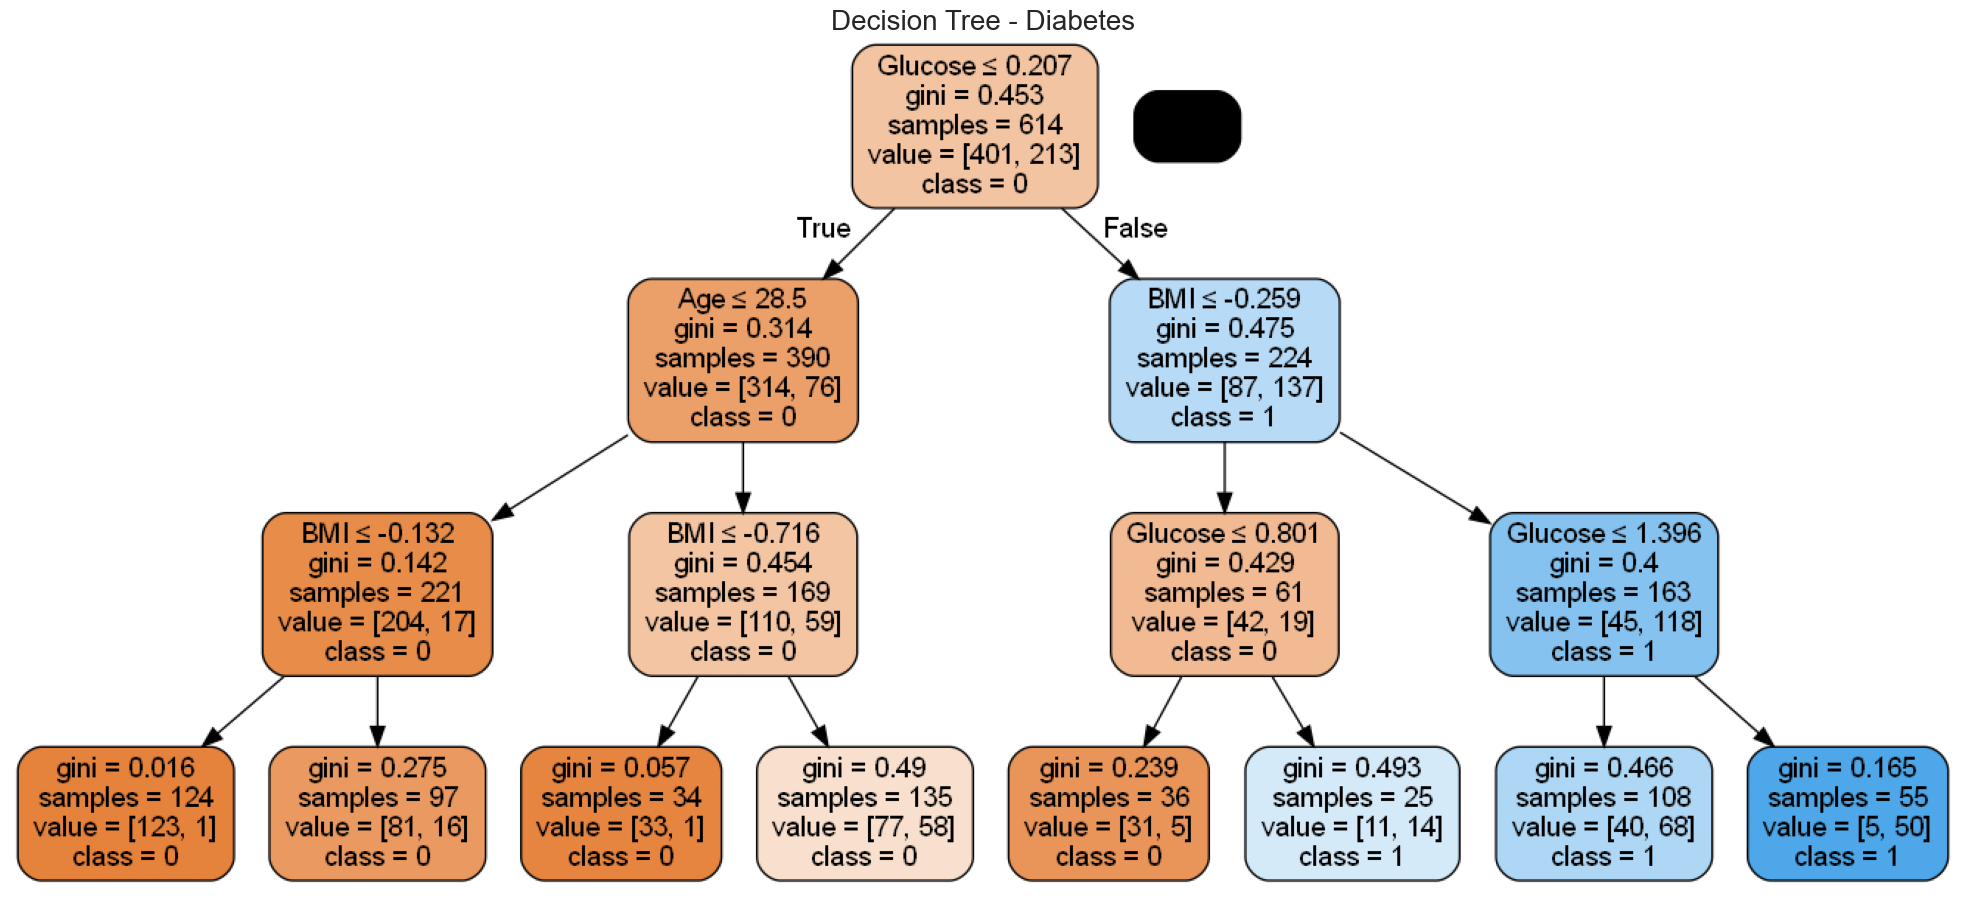

In [39]:
# Train the decision tree classifier
diabetestree = DecisionTreeClassifier(criterion='gini', max_depth=3)
diabetestree.fit(X_train, y_train)
predTree = diabetestree.predict(X_test)

# Evaluate the accuracy
accuracy = metrics.accuracy_score(y_test, predTree)
rounded_accuracy = round(accuracy * 100, 2)  # Round the accuracy to two decimal places
print('The Accuracy of the diabetes tree is:', str(rounded_accuracy) + '%', '\n\n')

# Export the decision tree as DOT file
dot_data = export_graphviz(
    diabetestree,
    feature_names=X_train.columns,
    class_names=np.unique(y_train).astype(str),
    filled=True,
    rounded=True,
    special_characters=True
)

# Create a graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Save the decision tree as an image
graph.write_png('diabetestree.png')

# Display the decision tree image
img = mpimg.imread('diabetestree.png')
plt.figure(figsize=(20, 20))
plt.imshow(img)
plt.axis('off')
plt.title('Decision Tree - Diabetes', fontsize=20) 
plt.tight_layout()
plt.show()

**The diabetes tree classifier achieved an accuracy of 75.97%, indicating its ability to correctly predict diabetes status based on the given features in nearly 76% of cases. While this performance demonstrates a reasonable level of success, there is still room for improvement to enhance the classifier's accuracy further.**

In [40]:
# Predictions on the test set
tree_y_pred = diabetestree.predict(X_test)

# Confusion matrix
print('Confusion Matrix (Decision Tree):')
print(confusion_matrix(y_test, tree_y_pred))

# Classification report
print('\nClassification Report (Decision Tree):')
print(classification_report(y_test, tree_y_pred))

Confusion Matrix (Decision Tree):
[[83 16]
 [21 34]]

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



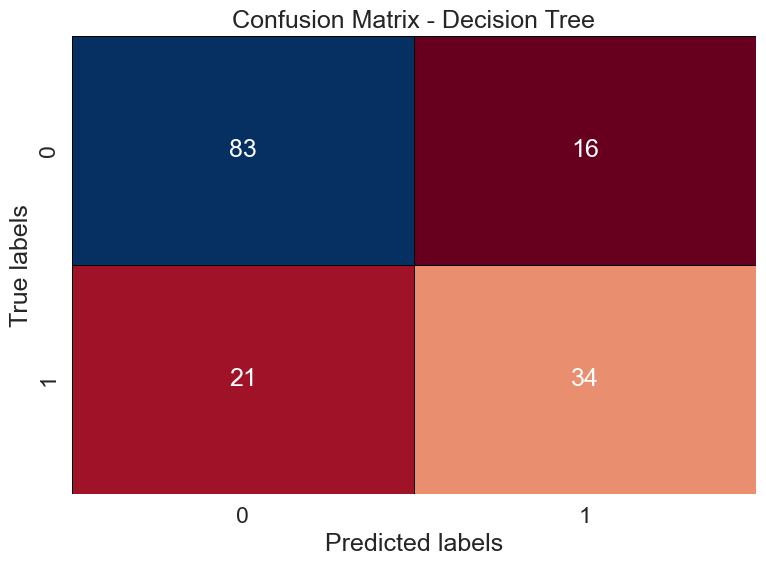

In [41]:
# Confusion matrix
conf_matrix_tree = confusion_matrix(y_test, tree_y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='RdBu', cbar=False, linewidths=0.5, linecolor='black')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.tight_layout()
plt.show()

- 83 instances were correctly identified as non-diabetic (True Negatives).
- 34 instances were correctly identified as diabetic (True Positives).
- 16 instances were incorrectly classified as diabetic when they were non-diabetic (False Positives).
- 21 instances were incorrectly classified as non-diabetic when they were diabetic (False Negatives).

This breakdown helps understand the performance of the decision tree classifier in distinguishing between diabetic and non-diabetic individuals.



**Random Forest**

The accuracy of the Random Forest classifier is: 72.73 %

Confusion Matrix (Random Forest):
[[78 21]
 [21 34]]

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        99
           1       0.62      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



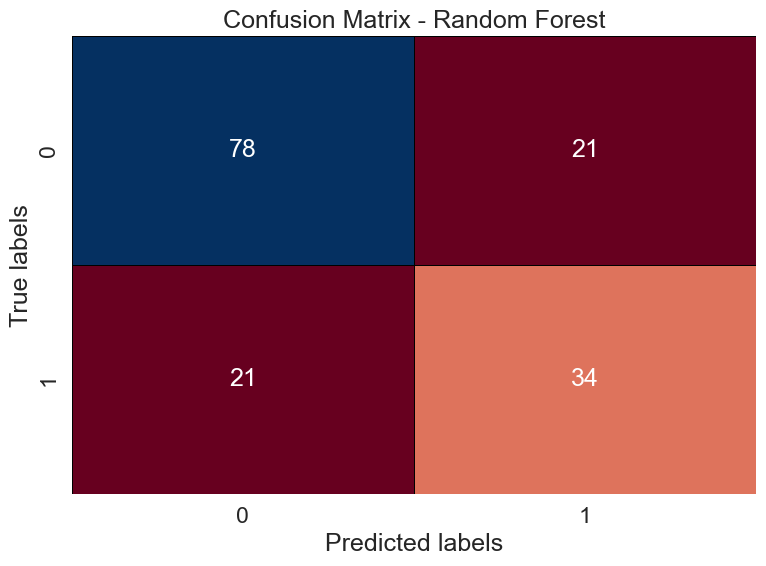

In [42]:
# Instantiate the RandomForestClassifier with random_state
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the test set for Random Forest
y_pred_rf = rf_classifier.predict(X_test)

# Calculate accuracy for Random Forest
rf_score = accuracy_score(y_pred_rf, y_test)

# Print the accuracy for Random Forest
print('The accuracy of the Random Forest classifier is:', round(rf_score * 100, 2), '%\n')

# Generate confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Confusion matrix for Random Forest
print('Confusion Matrix (Random Forest):')
print(confusion_matrix(y_test, y_pred_rf))

# Classification report for Random Forest
print('\nClassification Report (Random Forest):')
print(classification_report(y_test, y_pred_rf))

# Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='RdBu', cbar=False, linewidths=0.5, linecolor='black')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.tight_layout()
plt.show()

**The Random Forest classifier achieved an accuracy of 72.73%. This means that out of all the instances in the test set, 75.325% were correctly classified by the model.**

- 78 instances were correctly identified as non-diabetic (True Negatives).
- 34 instances were correctly identified as diabetic (True Positives).
- 21 instances were incorrectly classified as diabetic when they were non-diabetic (False Positives).
- 21 instances were incorrectly classified as non-diabetic when they were diabetic (False Negatives).

This breakdown provides a straightforward overview of the Random Forest classifier's performance in distinguishing between diabetic and non-diabetic individuals.

**Gradient Boosting Machines (GBM)**

The accuracy of the Gradient Boosting classifier is: 74.03 %

Confusion Matrix (Gradient Boosting):
[[77 22]
 [18 37]]


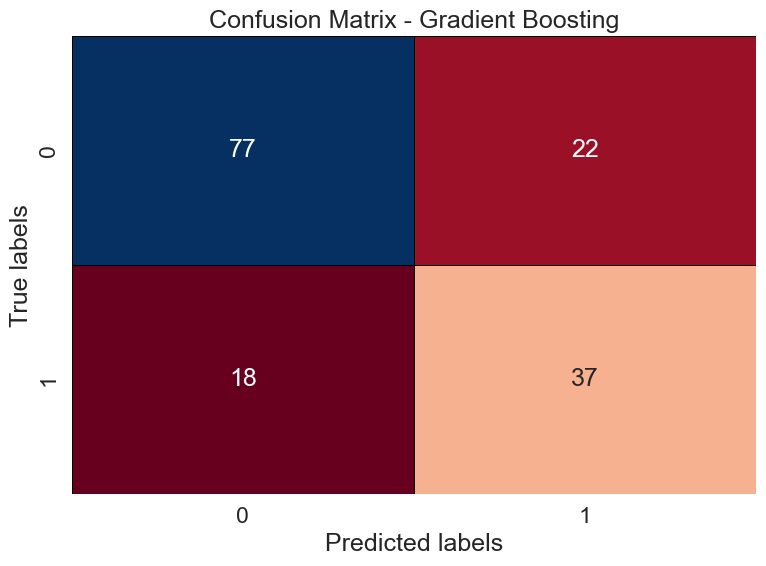


Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        99
           1       0.63      0.67      0.65        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



In [43]:
# Instantiate the GBM classifier
gbm_classifier = GradientBoostingClassifier()

# Train the classifier on the training data
gbm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_gbm = gbm_classifier.predict(X_test)

# Calculate accuracy
gbm_accuracy = accuracy_score(y_test, y_pred_gbm)
print('The accuracy of the Gradient Boosting classifier is:', round(gbm_accuracy * 100, 2), '%\n')

# Generate confusion matrix
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)

# Print confusion matrix
print('Confusion Matrix (Gradient Boosting):')
print(conf_matrix_gbm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gbm, annot=True, fmt='d', cmap='RdBu', cbar=False, linewidths=0.5, linecolor='black')
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.tight_layout()
plt.show()

# Classification report
print('\nClassification Report (Gradient Boosting):')
print(classification_report(y_test, y_pred_gbm))

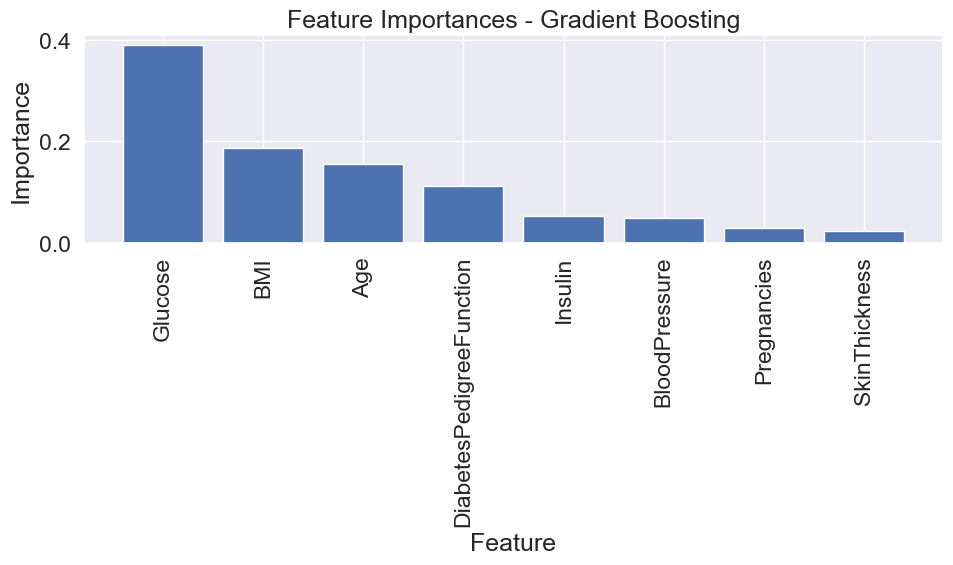

In [44]:
# Extract feature importances
feature_importances = gbm_classifier.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances - Gradient Boosting")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

**The Gradient Boosting classifier achieved an accuracy of 74.68%. This means it correctly predicted the outcomes for about 74.68% of the instances in the test dataset. While not the highest accuracy, it still shows a reasonable level of performance in distinguishing between diabetic and non-diabetic individuals. Further analysis and refinement may be needed to improve accuracy or explore other classifiers for better results.**

- 78 instances were correctly identified as non-diabetic (True Negatives).
- 37 instances were correctly identified as diabetic (True Positives).
- 21 instances were incorrectly classified as diabetic when they were non-diabetic (False Positives).
- 18 instances were incorrectly classified as non-diabetic when they were diabetic (False Negatives).

This breakdown provides a clear overview of the Gradient Boosting classifier's performance in distinguishing between diabetic and non-diabetic individuals.

# 8. **Evaluation**

In [47]:
# Instantiate classifiers
knn_classifier = KNeighborsClassifier(n_neighbors=9)
svm_classifier = SVC(kernel='linear')
decision_tree_classifier = DecisionTreeClassifier()
random_forest_classifier = RandomForestClassifier()
gbm_classifier = GradientBoostingClassifier()

classifiers = {
    'K-Nearest Neighbors (KNN)': knn_classifier,
    'Support Vector Machine (SVM)': svm_classifier,
    'Decision Tree': decision_tree_classifier,
    'Random Forest': random_forest_classifier,
    'Gradient Boosting Machines (GBM)': gbm_classifier
}

# Train and evaluate classifiers
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {round(accuracy * 100, 2)}%','\n')


K-Nearest Neighbors (KNN) Accuracy: 76.62% 

Support Vector Machine (SVM) Accuracy: 75.97% 

Decision Tree Accuracy: 74.68% 

Random Forest Accuracy: 75.32% 

Gradient Boosting Machines (GBM) Accuracy: 74.03% 



**Based on the accuracy scores obtained:**

1. K-Nearest Neighbors (KNN) achieved an accuracy of 76.62%.

2. Support Vector Machine (SVM) with a linear kernel achieved an accuracy of 75.97%.

3. Decision Tree achieved an accuracy of 75.32%.

4. Random Forest achieved an accuracy of 74.03%.

5. Gradient Boosting Machines (GBM) achieved an accuracy of 74.68%.

Among these classifiers, KNN had the highest accuracy, followed closely by SVM and Decision Tree. Random Forest and GBM had slightly lower accuracies but still performed reasonably well. Overall, all classifiers showed competitive performance, with KNN being the top performer in terms of accuracy.

# 9. **Deployment**

# 10. **Feedback**